<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/LongShortCointegra%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [394]:
import yfinance as yf

import numpy as np
import pandas as pd

import seaborn
from seaborn.matrix import axis_ticklabels_overlap
import matplotlib.pyplot as plt
from pylab import rcParams
#rcParams['figure.figsize'] = 15, 5

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [406]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

def residuos (x,y):
  xx = np.array(x)
  yy = np.array(y)
  xx = sm.add_constant(xx)
  model = sm.OLS(yy, xx)
  results = model.fit()
  intercept, slope = results.params
  r_sq = results.rsquared 
  return yy -  slope*np.array(x) , slope , intercept , r_sq 

def estacionaridade(X, cutoff=0.01 , booleano=False):
     # H_0 é nao-estacionário, i.e., admite raiz unitaria (teste adfuller)    
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' A serie "'+X.name+'" é, provavelmente, estacionaria.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' A serie "'+X.name+'" é, provavelmente, não-estacionaria.')
        return False

def find_cointegrated_pairs(data,cutoff=0.05):
  n = data.shape[1]
  score_matrix = np.zeros((n, n))
  pvalue_matrix = np.ones((n, n))
  keys = data.keys()
  pairs = []
  for i in range(n):
      for j in range(i+1, n):
          X = data[keys[i]]
          Y = data[keys[j]]
          result = coint(X, Y)
          score = result[0]
          pvalue = result[1]
          score_matrix[i, j] = score
          pvalue_matrix[i, j] = pvalue
          if pvalue < cutoff:
              pairs.append((keys[i], keys[j]))
  return score_matrix, pvalue_matrix, pairs 



def arrange_subplots(xs, ys, n_plots , tt =[]):
  """
  ---- Parameters ----
  xs (n_plots, d): list with n_plot different lists of x values that we wish to plot
  ys (n_plots, d): list with n_plot different lists of y values that we wish to plot
  n_plots (int): the number of desired subplots
  """
  from matplotlib import gridspec
  %matplotlib inline

  # compute the number of rows and columns
  if n_plots<3 : 
    n_cols = 3
    n_rows = 1
  else: 
    n_cols = int(np.sqrt(n_plots))
    n_rows = int(np.ceil(n_plots / n_cols))

  # setup the plot
  gs = gridspec.GridSpec(n_rows, n_cols)
  scale = max(n_cols, n_rows)
  fig = plt.figure(figsize=(.5 * scale, .5 * scale))

  # loop through each subplot and plot values there
  for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    ax.title.set_text(tt[i])
    ax.plot(xs[i], ys[i])
    plt.axhline(y = 0, color = 'silver', linestyle = '-')
    plt.axhline(y = 1, color = 'orange', linestyle = '-')
    plt.axhline(y = -1, color = 'orange', linestyle = '-')
    plt.axhline(y = 2, color = 'red', linestyle = '-')
    plt.axhline(y = -2, color = 'red', linestyle = '-')

    plt.show()

#############################################################################################################
symbols = [
    'RRRP3', 'ENEV3','PETR3', 'PETR4', 'PRIO3',
    'ABEV3', 'ASAI3','CRFB3','LREN3', 'MGLU3','PCAR3', 'VIIA3',
    'AZUL4', 'GOLL4', 'CVCB3',
    'B3SA3', 'BPAN4','BPAC11', 'BBSE3','BBDC3', 'BBDC4', 'BBAS3', 'CIEL3','ITSA4','ITUB4', 'SANB11',
    'IGTI11','MULT3',
    'BRAP4', 'CMIN3', 'GGBR4', 'GOAU4','CSNA3','USIM5','VALE3',
    'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3',
    'CCRO3', 'ECOR3',
    'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENGI11','EGIE3', 'EQTL3','TAEE11',
    'CYRE3', 'DXCO3', 'EZTC3','JHSF3','MRVE3',
    'HAPV3', 'HYPE3', 'QUAL3', 'RADL3', 'RDOR3',
    'LWSA3', 'POSI3', 'TOTS3','SQIA3' , 'VLID3' ,
    'UGPA3', 'VBBR3', 
    'BOVA11', 'SMAL11'
    ] 

In [446]:
coint(X,Y)

(-4.426911992499564,
 0.001610727002963003,
 array([-3.94096428, -3.3607786 , -3.0615268 ]))

In [445]:
coint(Y, X, trend='c')

(-3.894682989929201,
 0.010088226130642242,
 array([-3.94096428, -3.3607786 , -3.0615268 ]))

In [444]:
X

Date
2022-08-18    15.199160
2022-08-19    14.876178
2022-08-22    14.648190
2022-08-23    14.667189
2022-08-24    15.009171
                ...    
2023-08-14    14.330000
2023-08-15    14.200000
2023-08-16    14.180000
2023-08-17    14.220000
2023-08-18    14.360000
Name: ABEV3.SA, Length: 250, dtype: float64

In [478]:
y = Y.values.astype(float)
x = X.values.astype(float)

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
intercept, slope = results.params
adfuller(results.resid)

(-3.8861543683193496,
 0.002139139465980294,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 420.9636139526026)

In [479]:
y = Y.values.astype(float)
x = X.values.astype(float)

x = sm.add_constant(x)

model = sm.OLS(y, x)
results = model.fit()
intercept, slope = results.params
adfuller( y - slope*X.values.astype(float))

(-3.8861543683193265,
 0.0021391394659804673,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 420.9636139526026)

In [471]:
adfuller(results.resid )

(-3.8861543683193496,
 0.002139139465980294,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 420.9636139526026)

In [472]:
adfuller( Y.values.astype(float) - ( slope*X.values.astype(float) +intercept))

(-3.8861543683193496,
 0.002139139465980294,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 420.9636139526026)

In [473]:
adfuller( Y.values.astype(float) - slope*X.values.astype(float) )

(-3.8861543683193265,
 0.0021391394659804673,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 420.9636139526026)

In [477]:
adfuller( results.predict() - slope*X.values.astype(float) )

/home/yair/.local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:940: RuntimeWarning:

divide by zero encountered in log



(nan,
 nan,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 -inf)

In [469]:
Y.values.astype(float) - ( slope*X.values.astype(float) +intercept)

array([ 1.46862993e+00,  4.39142057e-01, -4.50857854e-01,  7.58813683e-01,
        1.19814552e+00,  1.24471968e+00,  1.52554125e-01, -3.94681019e-01,
       -1.20414738e+00, -1.63641388e+00, -1.52699561e+00, -1.55912980e+00,
       -1.19660728e+00, -1.60205355e+00, -1.91157393e+00, -5.16315026e-01,
       -4.69501582e-01, -1.24778422e+00, -2.09763605e+00, -2.31789398e+00,
       -2.23069698e+00, -1.39988696e+00, -1.29760976e+00, -2.18991058e+00,
       -1.57087079e+00, -2.26949653e+00, -2.89289982e+00, -2.75595015e+00,
       -2.12937121e+00, -2.48316483e+00, -2.03915734e+00, -1.41964649e-01,
        2.95615808e-01,  4.15188191e-01,  4.80801280e-01, -9.26285482e-01,
       -1.63387559e+00, -2.18658729e+00, -2.23339788e+00, -3.26383717e+00,
       -3.16886078e+00, -2.88433734e+00, -3.14958065e+00, -2.43096265e+00,
       -1.22914050e+00, -2.45301940e+00, -3.06904902e+00, -2.52895303e+00,
       -1.71242037e+00, -1.94925850e+00, -1.53674975e+00, -1.45272649e+00,
       -1.07417522e+00,  

In [470]:
results.resid 

array([ 1.46862993e+00,  4.39142057e-01, -4.50857854e-01,  7.58813683e-01,
        1.19814552e+00,  1.24471968e+00,  1.52554125e-01, -3.94681019e-01,
       -1.20414738e+00, -1.63641388e+00, -1.52699561e+00, -1.55912980e+00,
       -1.19660728e+00, -1.60205355e+00, -1.91157393e+00, -5.16315026e-01,
       -4.69501582e-01, -1.24778422e+00, -2.09763605e+00, -2.31789398e+00,
       -2.23069698e+00, -1.39988696e+00, -1.29760976e+00, -2.18991058e+00,
       -1.57087079e+00, -2.26949653e+00, -2.89289982e+00, -2.75595015e+00,
       -2.12937121e+00, -2.48316483e+00, -2.03915734e+00, -1.41964649e-01,
        2.95615808e-01,  4.15188191e-01,  4.80801280e-01, -9.26285482e-01,
       -1.63387559e+00, -2.18658729e+00, -2.23339788e+00, -3.26383717e+00,
       -3.16886078e+00, -2.88433734e+00, -3.14958065e+00, -2.43096265e+00,
       -1.22914050e+00, -2.45301940e+00, -3.06904902e+00, -2.52895303e+00,
       -1.71242037e+00, -1.94925850e+00, -1.53674975e+00, -1.45272649e+00,
       -1.07417522e+00,  

In [411]:
N=int(len(symbols)*(len(symbols)-1)/2)
N

2346

In [ ]:
relative_cutoff = 1 * 10 ** (-int(np.log(N)/np.log(10))-1)
relative_cutoff

0.0001

In [ ]:
dados = yf.download((pd.Series(symbols)+'.SA').to_list(), period = '1y', auto_adjust=True , progress = False)['Close']
dados.dropna(inplace=True)
dados.shape[0]

250

In [ ]:
symbols=dados.keys()
symbols

Index(['ABEV3.SA', 'ASAI3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA',
       'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA', 'BOVA11.SA', 'BPAC11.SA',
       'BPAN4.SA', 'BRAP4.SA', 'BRFS3.SA', 'CCRO3.SA', 'CIEL3.SA', 'CMIG4.SA',
       'CMIN3.SA', 'CPFE3.SA', 'CPLE6.SA', 'CRFB3.SA', 'CSNA3.SA', 'CVCB3.SA',
       'CYRE3.SA', 'DXCO3.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA',
       'ENEV3.SA', 'ENGI11.SA', 'EQTL3.SA', 'EZTC3.SA', 'GGBR4.SA', 'GOAU4.SA',
       'GOLL4.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'ITSA4.SA', 'ITUB4.SA',
       'JBSS3.SA', 'JHSF3.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA',
       'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'POSI3.SA',
       'PRIO3.SA', 'QUAL3.SA', 'RADL3.SA', 'RDOR3.SA', 'RRRP3.SA', 'SANB11.SA',
       'SMAL11.SA', 'SQIA3.SA', 'TAEE11.SA', 'TOTS3.SA', 'UGPA3.SA',
       'USIM5.SA', 'VALE3.SA', 'VBBR3.SA', 'VIIA3.SA', 'VLID3.SA'],
      dtype='object')

In [ ]:
# dados = dados.apply(np.log)

In [407]:
scores, pvalues, pairs = find_cointegrated_pairs(dados,.005)#relative_cutoff)
len(pairs)

16

In [ ]:
pvalues.min()

6.986479079191046e-05

In [ ]:
scores[np.unravel_index(scores.argmin(), scores.shape)[0]][np.unravel_index(scores.argmin(), scores.shape)[1]]

-5.198611599673553

In [ ]:
print(symbols[np.unravel_index(pvalues.argmin(), pvalues.shape)[0]] 
      , symbols[np.unravel_index(pvalues.argmin(), pvalues.shape)[1]])

ENGI11.SA BPAC11.SA


In [ ]:
X= dados[symbols[np.unravel_index(scores.argmin(), scores.shape)[0]]]
Y= dados[symbols[np.unravel_index(scores.argmin(), scores.shape)[1]]]

In [ ]:
for pp in pairs:
    i = pd.Index(symbols).get_loc(pp[0])
    j = pd.Index(symbols).get_loc(pp[1])
    if (1-pvalues[i,j]) > 0.99:
        print(f' par {pp}; confiabilidade {(1-pvalues[i,j])*100:.2f}%; score {scores[i,j]}; p-valor {pvalues[i,j]} ')

 par ('ABEV3.SA', 'CSNA3.SA'); confiabilidade 99.84%; score -4.426911992499564; p-valor 0.001610727002963003 
 par ('BBSE3.SA', 'LWSA3.SA'); confiabilidade 99.66%; score -4.219810030423423; p-valor 0.0034035218602707436 
 par ('BPAC11.SA', 'ENGI11.SA'); confiabilidade 99.98%; score -4.963493596858814; p-valor 0.00019205176745377416 
 par ('BRFS3.SA', 'ENEV3.SA'); confiabilidade 99.70%; score -4.259777001648824; p-valor 0.002955744308316448 
 par ('BRFS3.SA', 'POSI3.SA'); confiabilidade 99.62%; score -4.187895897587465; p-valor 0.0038049113049904424 
 par ('CVCB3.SA', 'QUAL3.SA'); confiabilidade 99.72%; score -4.27693492253307; p-valor 0.00278069737636045 
 par ('CYRE3.SA', 'SQIA3.SA'); confiabilidade 99.63%; score -4.196928406718718; p-valor 0.0036871178265218824 
 par ('DXCO3.SA', 'VBBR3.SA'); confiabilidade 99.81%; score -4.38442507691814; p-valor 0.0018843906113554946 
 par ('ENEV3.SA', 'BRFS3.SA'); confiabilidade 99.84%; score -4.431660490052094; p-valor 0.0015825524801705325 
 par

In [405]:
import itertools
cointegra(dados,False)

UnboundLocalError: local variable 'slope' referenced before assignment

<AxesSubplot:>

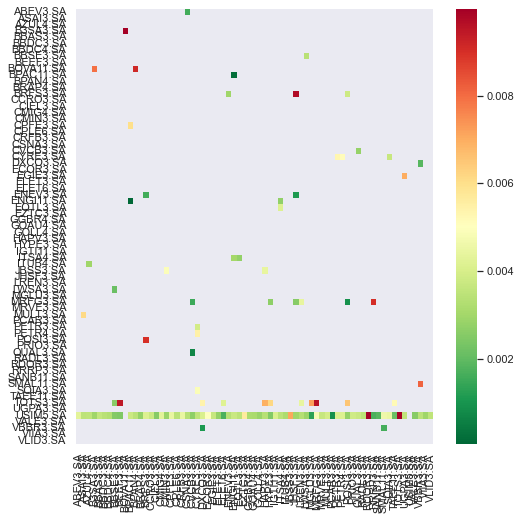

In [ ]:
seaborn.set(rc={'figure.figsize':(8,8)})
seaborn.heatmap(
    pvalues, 
    xticklabels=symbols, 
    yticklabels=symbols, 
    cmap='RdYlGn_r', 
    mask = (pvalues >= 0.01)
)

In [ ]:
# !pip install -qU kaleido
# import kaleido
# import plotly
# plotly.io.renderers.default = 'png'


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [ ]:
Y = dados[pairs[0][1]]
X = dados[pairs[0][0]]

In [ ]:
trace1 = go.Scatter( x = X.index,  y = X ,
                    name = X.name,
                    line=dict(color='steelblue'))

trace2 = go.Scatter( x = Y.index,  y = Y ,
                    name = Y.name , 
                    line=dict(color='lightgreen'))

fig = go.Figure(data=[trace1,trace2] )

fig.show()

In [ ]:
residuos(X,Y)

(Date
 2022-08-18    64.172872
 2022-08-19    62.973825
 2022-08-22    62.921778
 2022-08-23    64.828755
 2022-08-24    64.801904
                 ...    
 2023-08-14    61.508468
 2023-08-15    60.898884
 2023-08-16    61.169850
 2023-08-17    62.054928
 2023-08-18    61.550536
 Length: 250, dtype: float64, 3.6712636789574873)

In [ ]:


trace1 = go.Scatter( x = X.index,  y= zscore(residuos(x=X,y=Y)[0]) , 
                    name = 'resíduo (spread)',
                    line=dict(color='steelblue'))

trace2 = go.Scatter( x = Y.index,  y = zscore(X/Y) , 
                    name = 'Ratio '+X.name+'/'+Y.name,
                    line=dict(color='steelblue'))

fig = make_subplots(rows=2, cols=1,subplot_titles=(['z-score do residuo','z-score do ratio dos preços']))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(shapes=[{'type': 'line','y0':1,'y1': 1,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y1','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y1','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y1','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':0,'y1': 0,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y2','line': {'color': 'black','width': 1,'dash':'dash'}},
                             {'type': 'line','y0':1,'y1': 1,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':-1,'y1': -1,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y2','line': {'color': 'orange','width': 1}},
                             {'type': 'line','y0':2,'y1': 2,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y2','line': {'color': 'red','width': 1}},
                             {'type': 'line','y0':-2,'y1': -2,'x0':min(X.index),'x1':max(X.index),
                              'yref':'y2','line': {'color': 'red','width': 1}}
                             ],title='Para o par ('+X.name+','+Y.name+')')
fig.show()

In [ ]:
trades = pd.concat([zscore(X/Y), residuos(x=X,y=Y)[0]], axis=1)
trades.columns = ["sinal", "posicao"]

trades["acao"] = 0
trades.loc[trades.sinal <-1, "acao"] = 1  # compra par
trades.loc[trades.sinal > 1, "acao"] = -1  # vende par
trades

,sinal,posicao,acao
Date,,,
2022-08-18,-0.672618,64.172872,0
2022-08-19,-0.742958,62.973825,0
2022-08-22,-0.885059,62.921778,0
2022-08-23,-1.055218,64.828755,1
2022-08-24,-1.030405,64.801904,1
...,...,...,...
2023-08-14,0.815925,61.508468,0
2023-08-15,0.848114,60.898884,0
2023-08-16,0.671695,61.169850,0


In [ ]:
trades['pos1'] = trades['acao'].diff()
trades['oaca'] = -trades['acao']
trades['pos2'] = trades['oaca'].diff()
trades

,sinal,posicao,acao,pos1,oaca,pos2
Date,,,,,,
2022-08-18,-0.672618,64.172872,0,NaN,0,NaN
2022-08-19,-0.742958,62.973825,0,0.0,0,0.0
2022-08-22,-0.885059,62.921778,0,0.0,0,0.0
2022-08-23,-1.055218,64.828755,1,1.0,-1,-1.0
2022-08-24,-1.030405,64.801904,1,0.0,-1,0.0
...,...,...,...,...,...,...
2023-08-14,0.815925,61.508468,0,0.0,0,0.0
2023-08-15,0.848114,60.898884,0,0.0,0,0.0
2023-08-16,0.671695,61.169850,0,0.0,0,0.0


In [ ]:
C0 = 1000

CX = C0 // max(X)
CY =  C0 //max(Y)

portfolio = pd.DataFrame()

portfolio[X.name] = X
portfolio['Hold'+X.name] 

portfolio[Y.name] = Y



KeyError: 'HoldB3SA3.SA'

In [ ]:
portfolio

,BPAC11.SA
Date,
2022-08-18,25.476221
2022-08-19,25.116579
2022-08-22,24.688898
2022-08-23,25.155460
2022-08-24,25.379021
...,...
2023-08-14,32.639999
2023-08-15,31.790001
2023-08-16,31.090000


<AxesSubplot:xlabel='Date'>

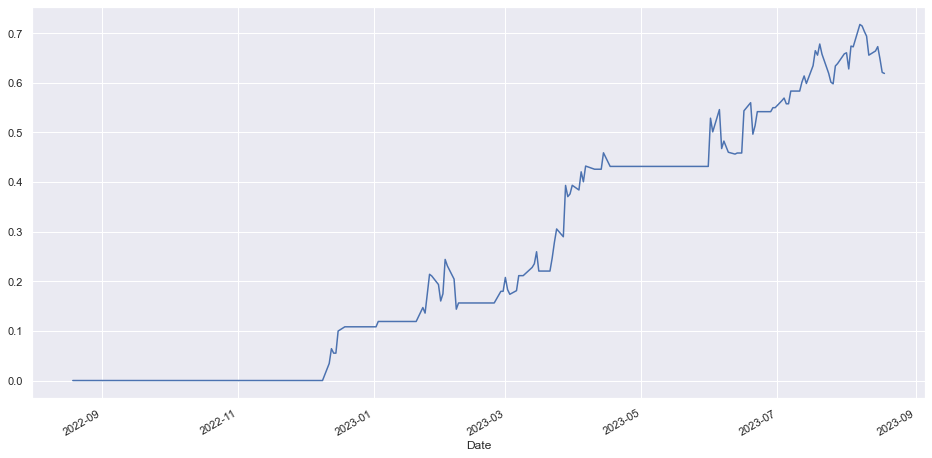

In [ ]:
retornos = trades.posicao.pct_change() * trades.acao
retornos.cumsum().plot(figsize=(16,8))

In [ ]:
a=pd.DataFrame({'a':[0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]})
a['b'] = -a['a']
a

,a,b
0,0,0
1,0,0
2,1,-1
3,1,-1
4,1,-1
5,1,-1
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
a.diff()

,a,b
0,NaN,NaN
1,0.0,0.0
2,1.0,-1.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,-1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0
